# Исследование объявлений о продаже квартир

Для исследования представлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Часть данных вписана пользователями, другая часть получена автоматически на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоёма).

Цель исследования - установить параметры, влияющие на стоимость недвижимости. Это позволит построить автоматизированную систему, которая будет определять аномалии и мошенническую деятельность.

Для достижения цели, необходимо решить следующие задачи:
- изучить данные;
- устранить ошибки, отклонения, влияющие на результат исследования;
- добавить вспомогательные столбцы для исследования;
- провести исследования данных по столбцам отдельно и во взаимосвязи друг с другом;
- определить влияние исследуемых параметров на стоимость квартир.



## Изучим общую информацию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest  

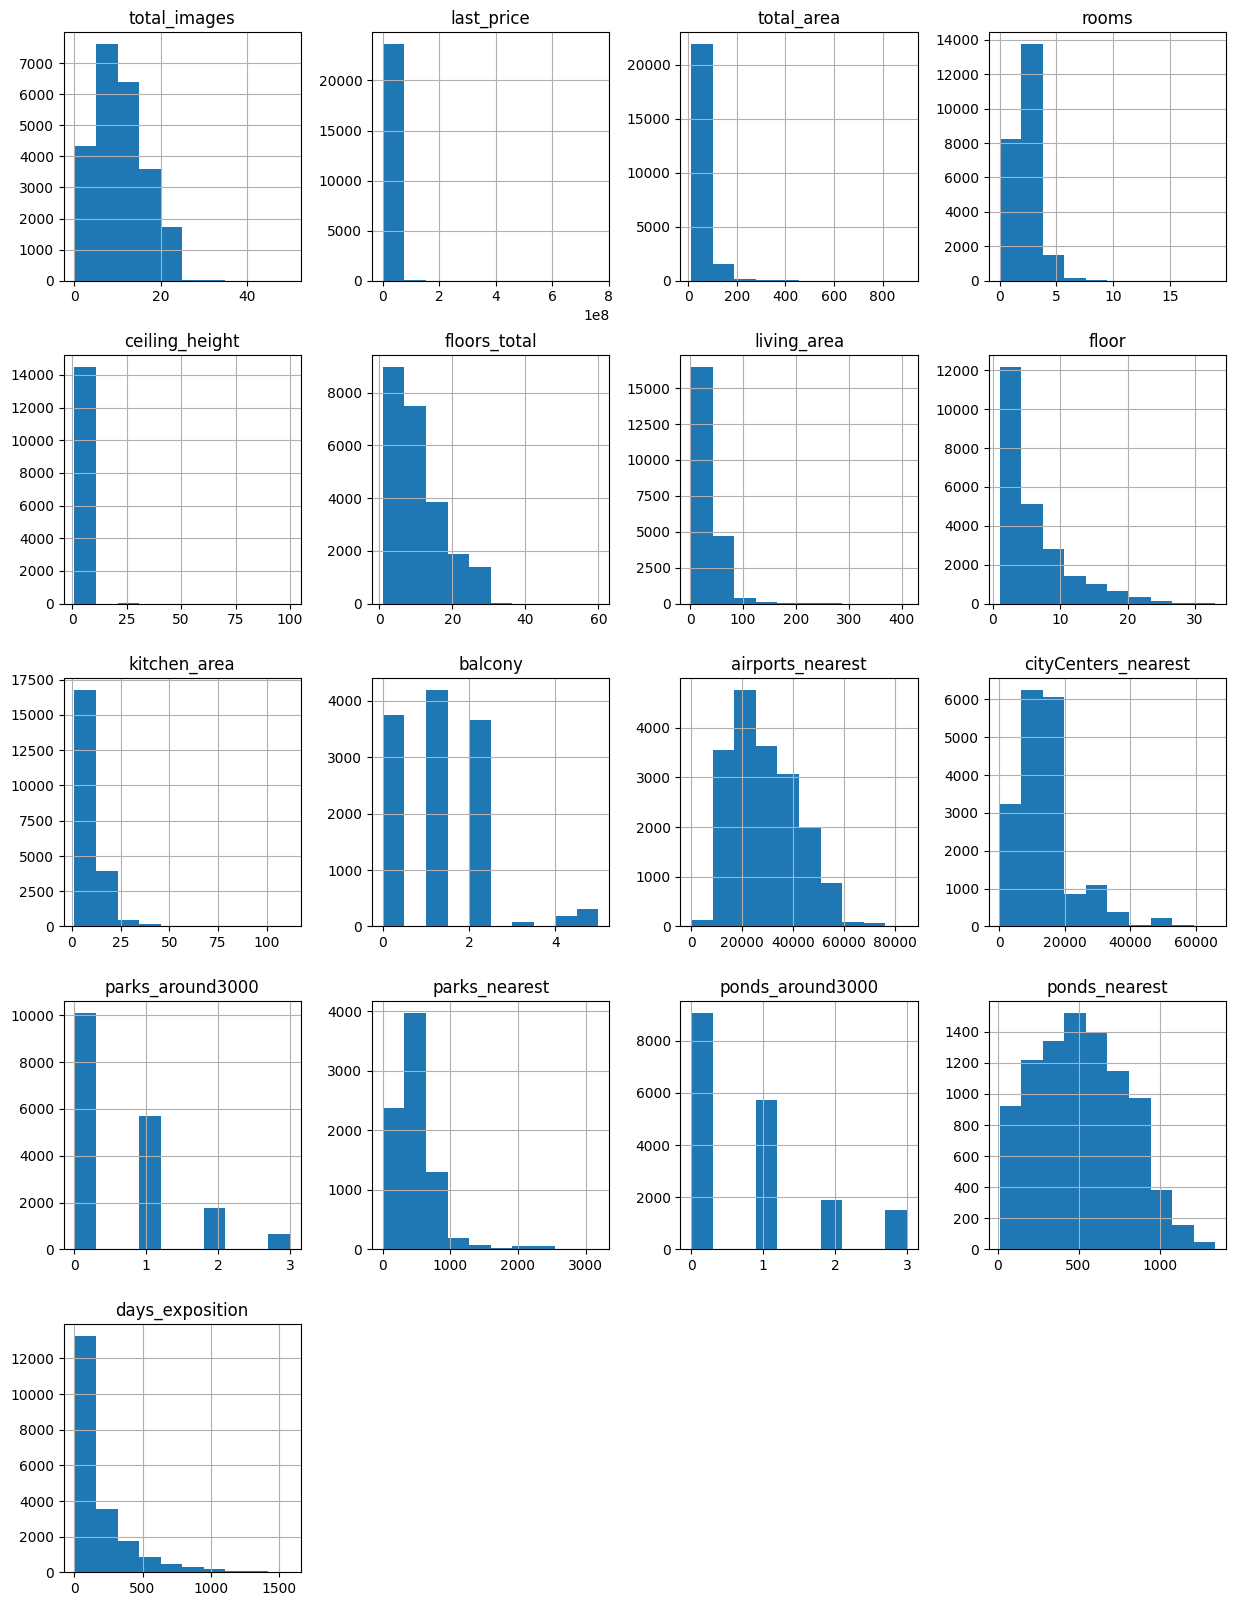

In [3]:
display(data.head(20))
print()
print(data.info())
print()
data.hist(figsize=(15, 20));



## Предобработка данных

**2.1.Обработка пропусков.**

In [4]:
print(data.isna().sum())
display(data.describe())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [34]:
data['ceiling_height'] = data.groupby('cityCenters_nearest')['ceiling_height'].fillna(data['ceiling_height'].median())
data = data.dropna(subset=['locality_name'])
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
print()
print(data.isna().sum())
display(data.describe())





total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           5387
floors_total               84
living_area              1859
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2160
balcony                     0
locality_name               0
airports_nearest         5408
cityCenters_nearest      5387
parks_around3000            0
parks_nearest           15183
ponds_around3000            0
ponds_nearest           14208
days_exposition          3071
price_meter                 0
week_day                    0
month                       0
year                        0
cityCenters_km           5387
floor_type                  0
dtype: int64


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,week_day,month,year,cityCenters_km
count,22995.000000,2.299500e+04,22995.000000,22995.000000,17608.000000,22911.000000,21136.000000,22995.000000,20835.000000,22995.000000,...,22995.000000,7812.000000,22995.000000,8787.000000,19924.000000,22995.000000,22995.000000,22995.000000,22995.000000,17608.000000
mean,9.852881,6.264021e+06,59.233587,2.047358,2.712749,10.597617,33.802740,5.846575,10.463356,0.523853,...,0.466884,489.651178,0.583866,521.021509,175.575587,98734.297634,2.570602,6.401479,2017.377952,14.226431
std,5.671033,7.408172e+06,31.399351,1.002160,0.245462,6.512652,19.705943,4.836056,5.723723,0.810196,...,0.746379,341.150003,0.876694,277.010532,206.221806,45479.140070,1.788481,3.489479,1.028096,8.623467
min,0.000000,1.219000e+04,12.000000,0.000000,0.800000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,111.834862,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.500000,2.000000,7.000000,0.000000,...,0.000000,287.000000,0.000000,298.000000,45.000000,76390.221796,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.600000e+06,51.500000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,453.000000,0.000000,504.000000,95.000000,94782.608696,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.730000,16.000000,42.000000,8.000000,11.910000,1.000000,...,1.000000,612.000000,1.000000,733.000000,228.000000,113883.946224,4.000000,10.000000,2018.000000,16.000000
max,50.000000,1.908700e+08,494.100000,6.000000,10.000000,29.000000,300.000000,27.000000,107.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1199.000000,995983.935743,6.000000,12.000000,2019.000000,66.000000


**Возможные причины возникновения пропусков.**

1) Пропуски не случайны:
- В столбце "days_exposition" имеются объявления, которые не сняты с публикации, соответственно, не имеют значений. Пропуски оставлены пустыми.
- В столбцах "balcony", "parks_around3000", "ponds_around3000" не указаны значения, так как они отсутствуют. В связи с этим значения заменены на "0"
- В столбце 'is_apartment' не указаны значения, так как строки не относятся к апартаментам. В связи с этим значения заменены на "False" - в соответствии с типом данных в столбце.

2) Пропуски случайны: В столбце 'ceiling_height' пропуски заменены медианными значениями.

3) Остальные пропуски оставлены пустыми:
floors_total               85,
living_area              1898,
kitchen_area             2269,
airports_nearest         5534,
cityCenters_nearest      5511,
parks_nearest           15586,
ponds_nearest           14565.





**2.2. Изменение типов данных.**

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['floor'] = data['floor'].astype('int')
data['balcony'] = data['balcony'].astype('int')

В ячейке выше строки переведены в формат "datetime". Остальные данные имеют числовой и булевый формат - достаточно для проведения иследования.
Для удобства переведем в целочисленный формат значения столбцов 'floor','balcony'

**2.3. Обработка дубликатов.**

In [7]:
data['locality_name'] = (data['locality_name'].str.lower().str.replace('ё', 'е') #превращяем неявные дубликаты в явные
    .str.replace('поселок городского типа', 'поселок')
    .str.replace('городской поселок', 'поселок'))

data = data.drop_duplicates().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        18139 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

In [8]:
# check
data.locality_name.nunique()

322

In [9]:
# check
data.locality_name.unique()

array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

**2.4. Редкие и выбивающиеся значения.**

**2.4.1. Построим графики для выявления выбивающихся значений:**

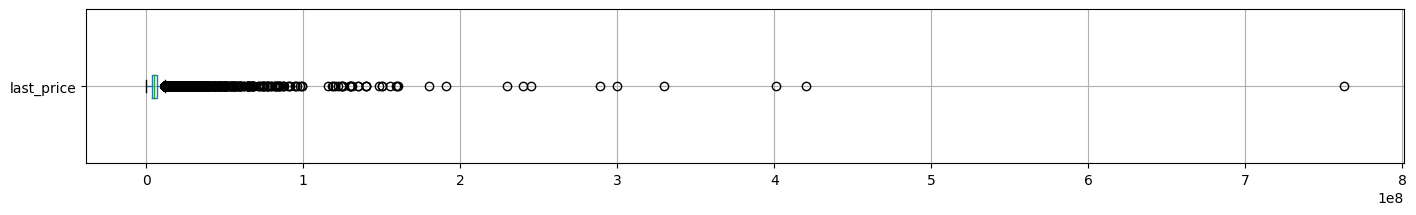

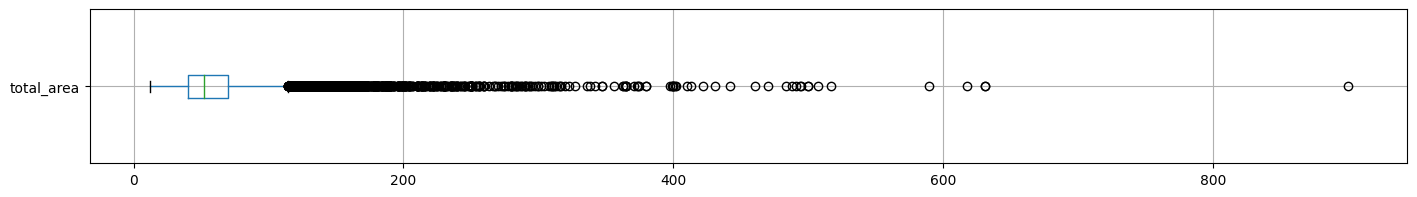

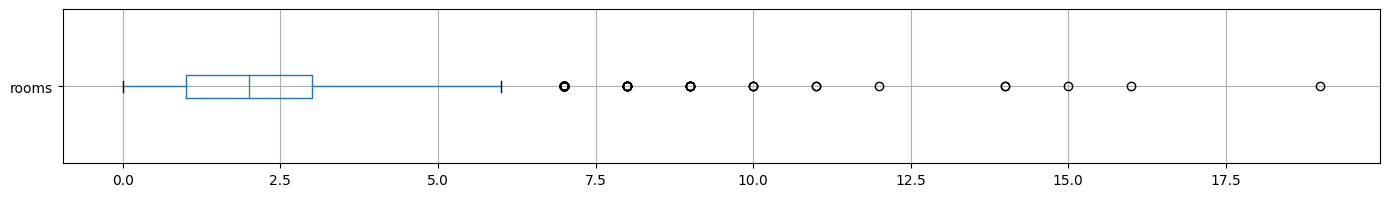

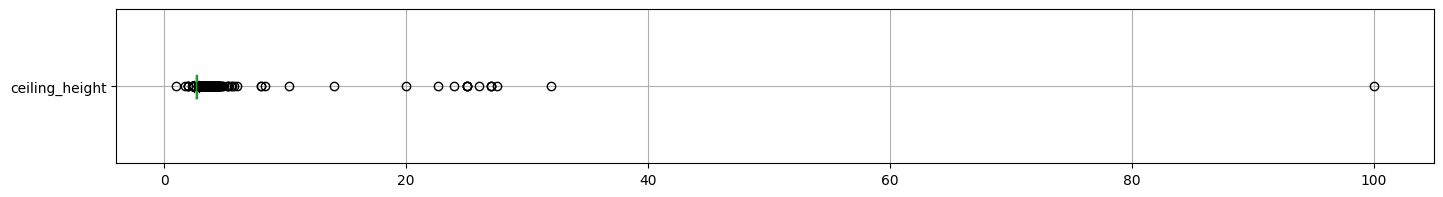

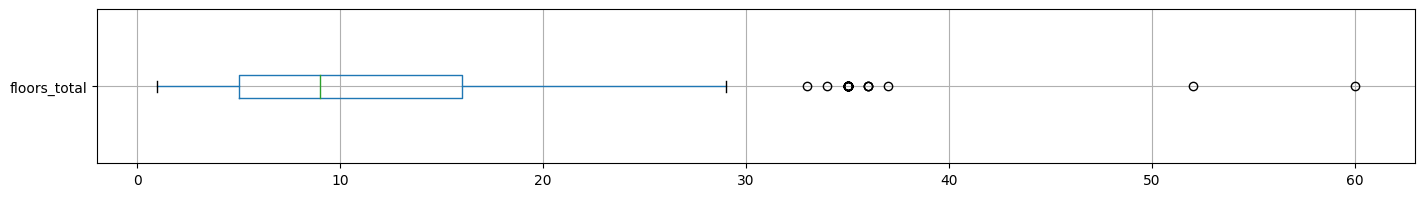

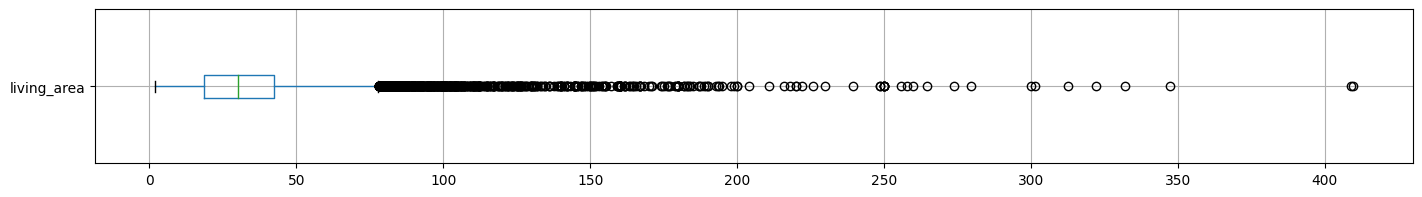

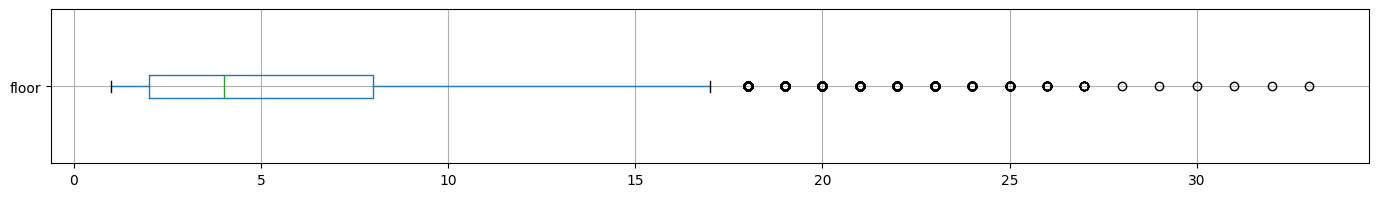

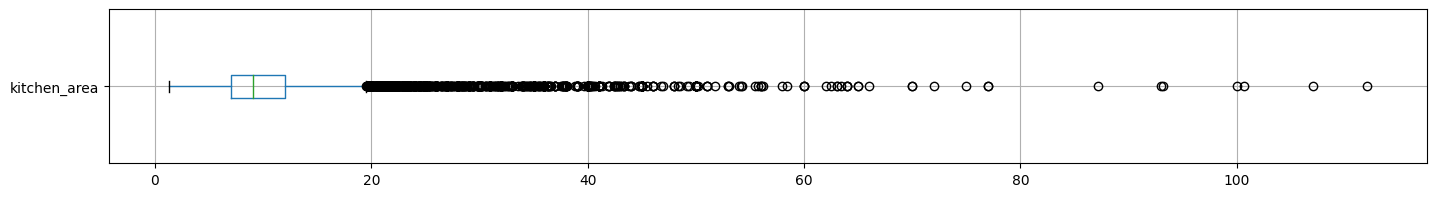

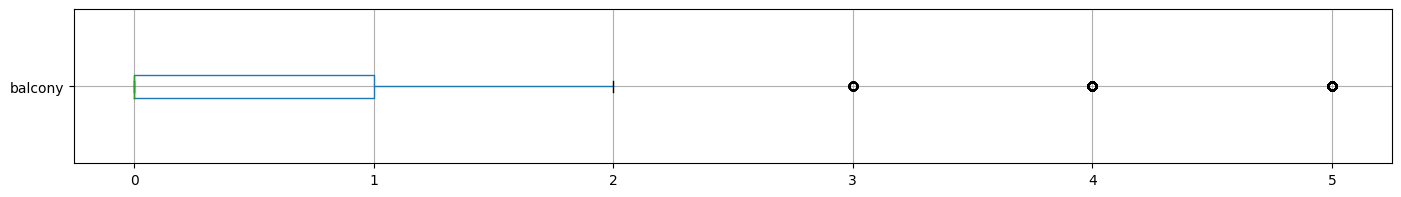

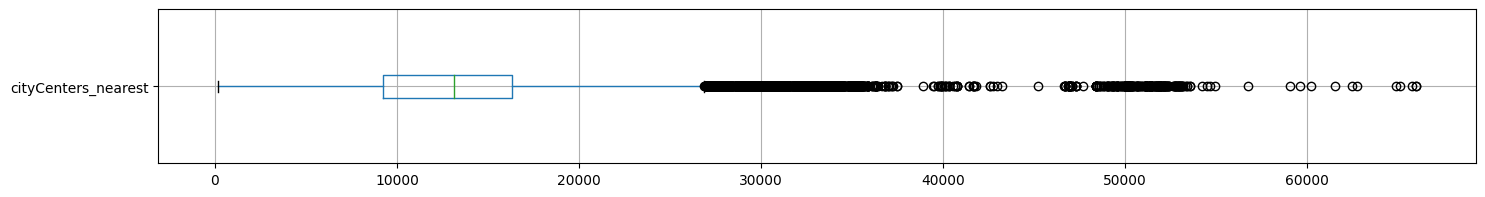

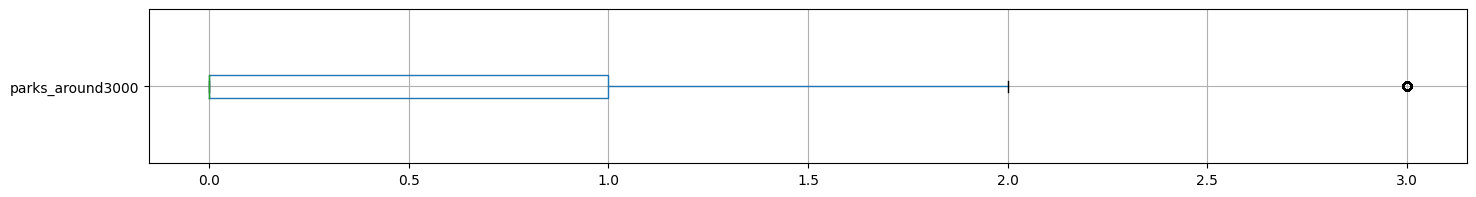

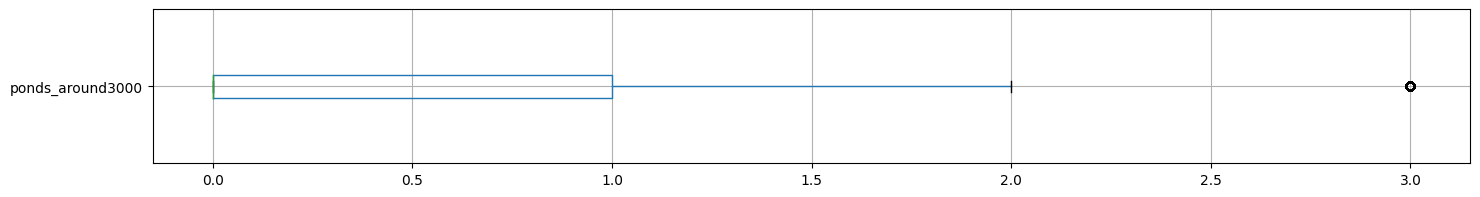

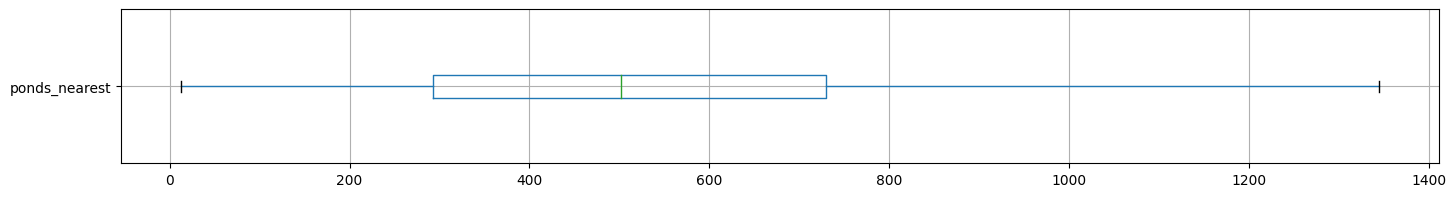

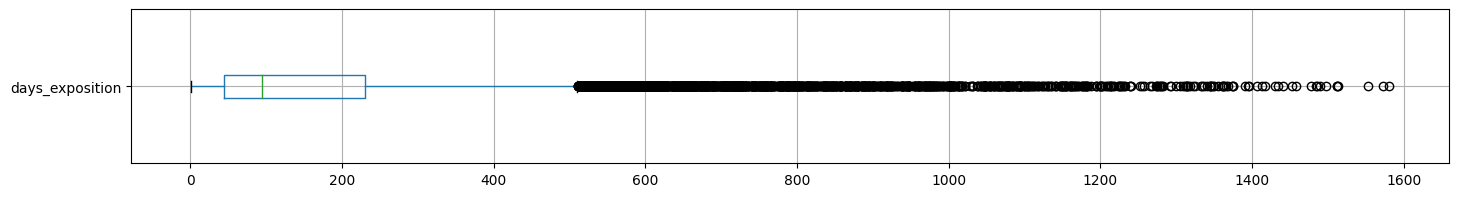

In [10]:
def make_boxplot(column):
    return data.boxplot(column, vert = False, figsize = (17,2))

make_boxplot('last_price')
plt.show()
make_boxplot('total_area')
plt.show()
make_boxplot('rooms')
plt.show()
make_boxplot('ceiling_height')
plt.show()
make_boxplot('floors_total')
plt.show()
make_boxplot('living_area')
plt.show()
make_boxplot('floor')
plt.show()
make_boxplot('kitchen_area')
plt.show()
make_boxplot('balcony')
plt.show()
make_boxplot('cityCenters_nearest')
plt.show()
make_boxplot('parks_around3000')
plt.show()
make_boxplot('ponds_around3000')
plt.show()
make_boxplot('ponds_nearest')
plt.show()
make_boxplot('days_exposition');

**2.4.2. Проверим уникальные значения**


In [11]:
print(data['last_price'].value_counts(dropna=False))
print()
print(data['rooms'].value_counts(dropna=False))
print()
print(data['ceiling_height'].value_counts(dropna=False).head(50))
print()
print(data['floors_total'].value_counts(dropna=False))
print()
print(data['floor'].value_counts(dropna=False))
print()
print(data['balcony'].value_counts(dropna=False))
print()
print(data['parks_around3000'].value_counts(dropna=False))
print()
print(data['ponds_around3000'].value_counts(dropna=False))
print()
print(data['days_exposition'].value_counts(dropna=False))

4500000.0     342
3500000.0     289
4300000.0     260
4000000.0     260
4200000.0     258
             ... 
12890000.0      1
29375000.0      1
7545600.0       1
5205000.0       1
11475000.0      1
Name: last_price, Length: 2964, dtype: int64

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

2.65    7184
NaN     5511
2.50    2540
2.60    1202
2.70    1164
3.00     982
2.80     831
2.55     752
2.75     668
3.20     260
3.10     194
2.90     142
3.30     134
3.50     123
2.56     108
2.57      94
3.40      90
2.85      89
2.54      77
2.64      77
2.52      63
2.53      56
2.77      55
3.15      55
2.58      50
2.76      48
2.78      47
3.05      42
2.95      42
3.25      36
4.00      35
3.60      35
2.67      34
2.51      33
2.73      29
3.70      28
2.72      27
2.74      24
2.68      22
3.80      20
2.84      19
2.82     

**2.4.3. Удалим строки с редкими анамальными значениями**

In [12]:
# Аномальные значения высоты потолков типа 25 и 30 заменим на 2.5, 3.0
data.loc[data['ceiling_height'] > 6, 'ceiling_height'] = data['ceiling_height'] / 10

# Удалим  строки, где здания выше 30 этажей
data = data.loc[(data['floors_total'] < 30) | data['floors_total'].isna()]

# Удалим строки, где балконов больше чем комнат+2
data = data.query('rooms+2 > balcony')

# Удалим строки, где длительность публикации объявления больше 1200 дней
data = data.loc[(data['days_exposition'] < 1200) | data['days_exposition'].isna()]

# Выбивающееся большое количество комнат может повлиять на результаты исследования, удалим строки с количеством больше 7
# Аналогично отсечем крайне большую площадь (в том числе жилую и кухни), стоимость.

data = data.loc[(data['rooms'] < 7) | data['rooms'].isna()]
data = data.loc[(data['total_area'] < 500) | data['total_area'].isna()]
data = data.loc[(data['last_price'] < 200000000) | data['last_price'].isna()]
data = data.loc[(data['living_area'] < 400) | data['living_area'].isna()]
data = data.loc[(data['kitchen_area'] < 150) | data['kitchen_area'].isna()]

## Добавим в таблицу новые столбцы

In [13]:
data['price_meter'] = data['last_price'] / data['total_area'] #добавляем столбец с ценой за кв. м


data['week_day'] = data['first_day_exposition'].dt.weekday #добавляем столбец с денем недели публикации

data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month #добавляем столбец с месяцем публикации

data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year #добавляем столбец с годом публикации

data['cityCenters_km'] = (data['cityCenters_nearest'] / 1000).round() #добавляем столбец с расстоянием до центра в километрах

In [14]:
def floor_category(i): #добавляем столбец с типом этажа
    if i['floor'] == 1:
        return 'первый'
    if i['floor'] == i['floors_total']:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(floor_category, axis=1)

In [15]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 24, 23])

## Исследовательский анализ данных


**4.1. Изучение параметров**

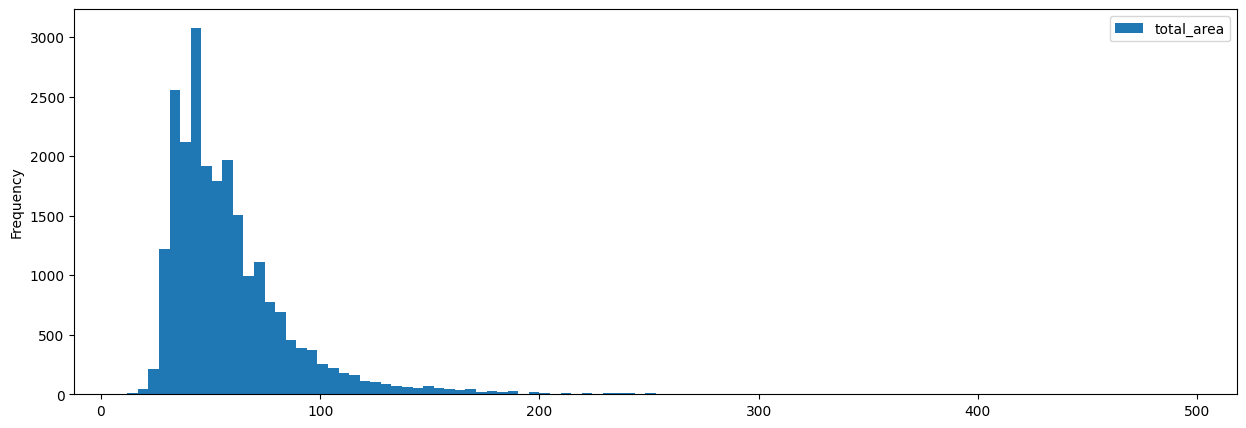

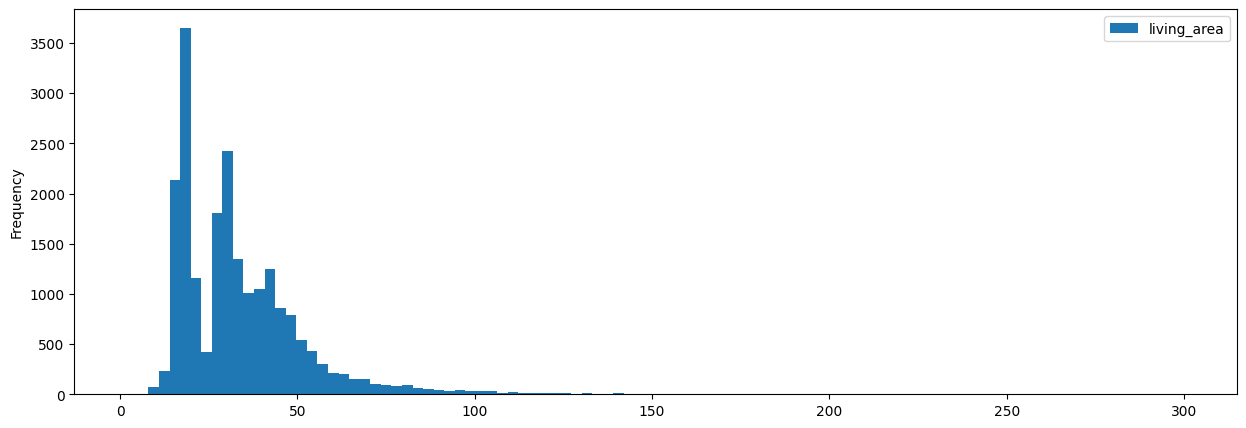

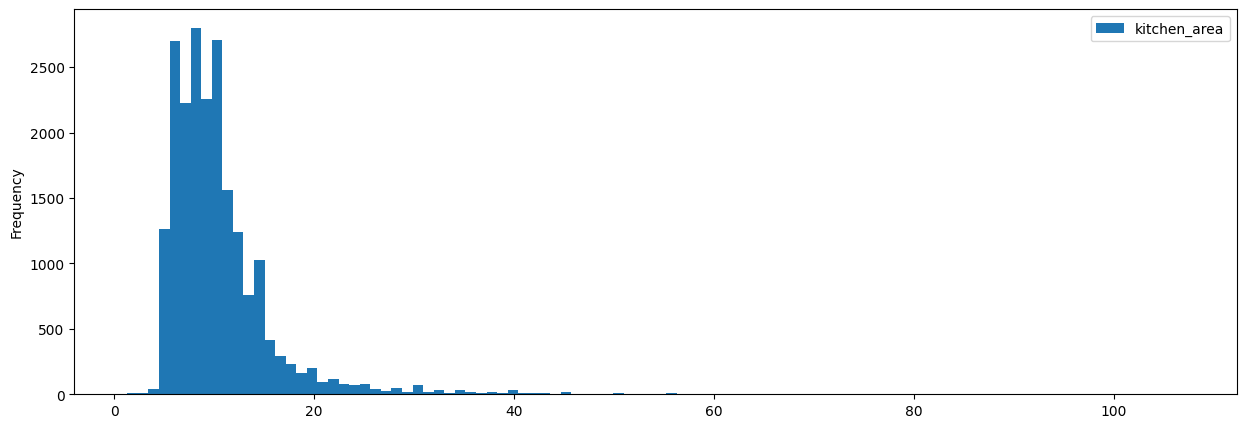

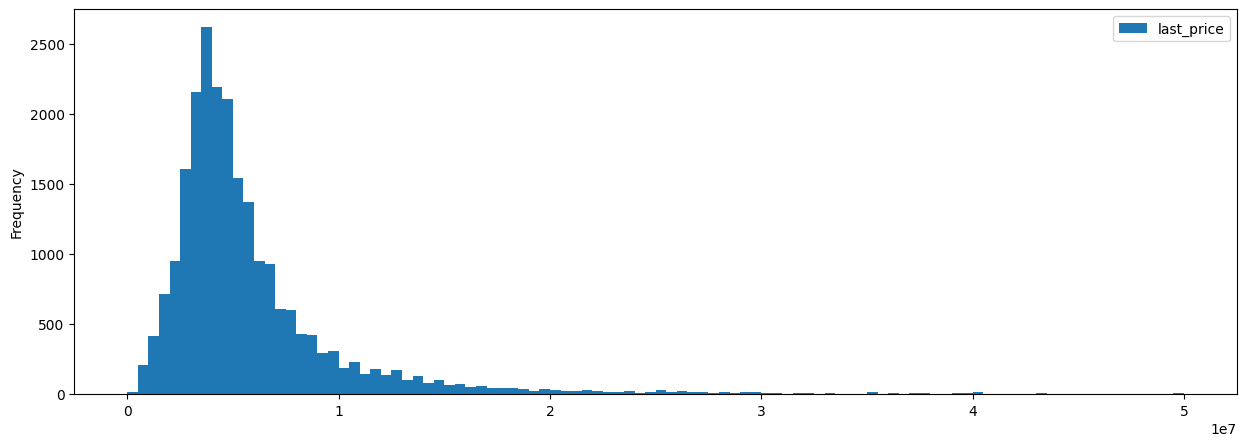

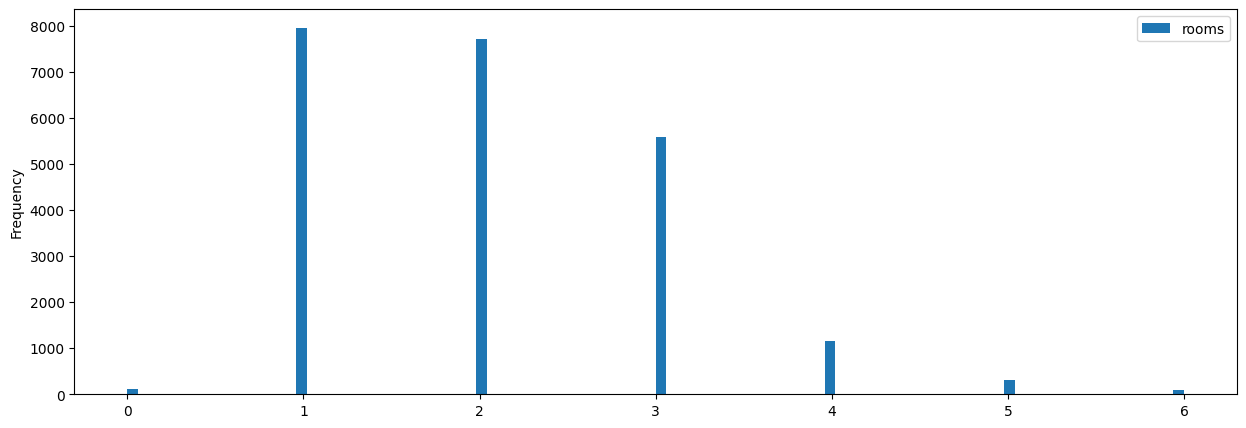

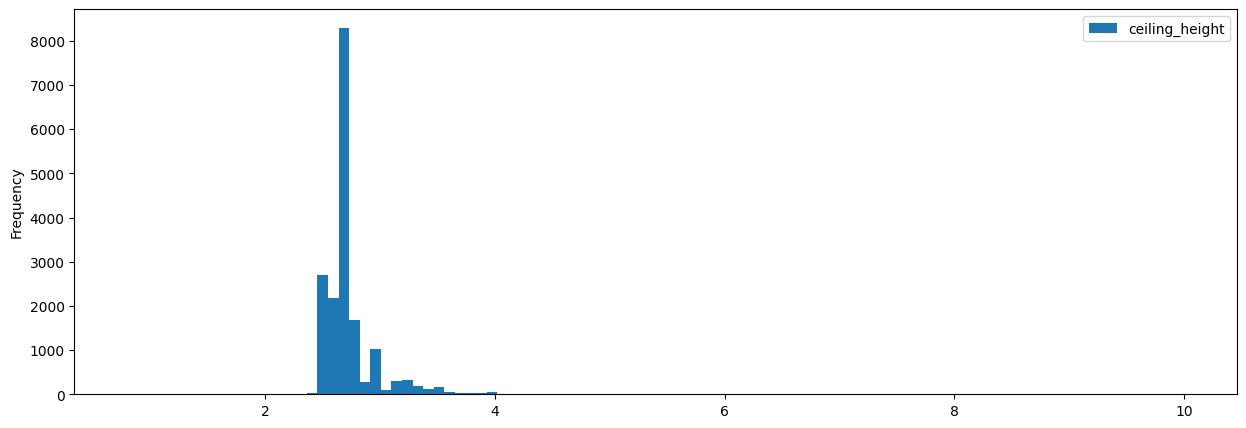

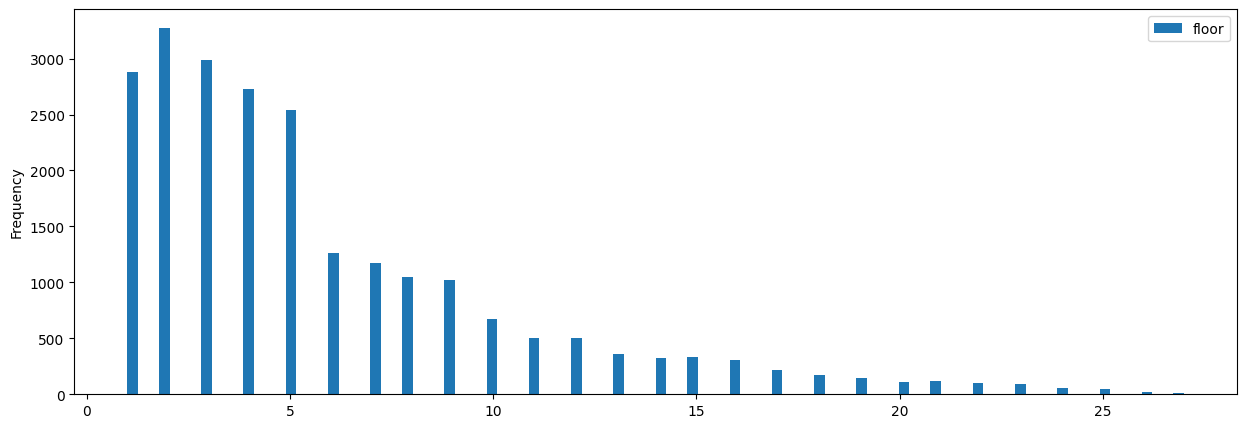

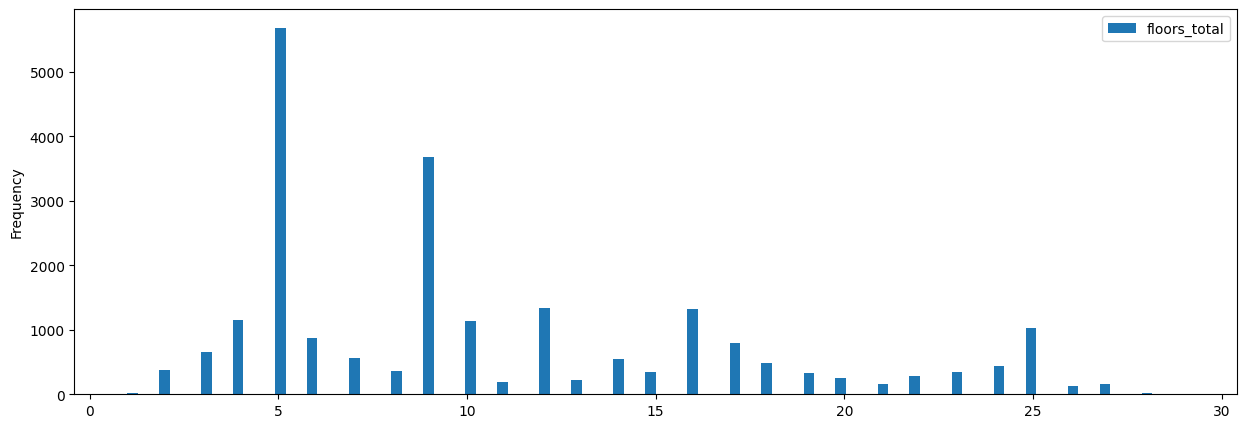

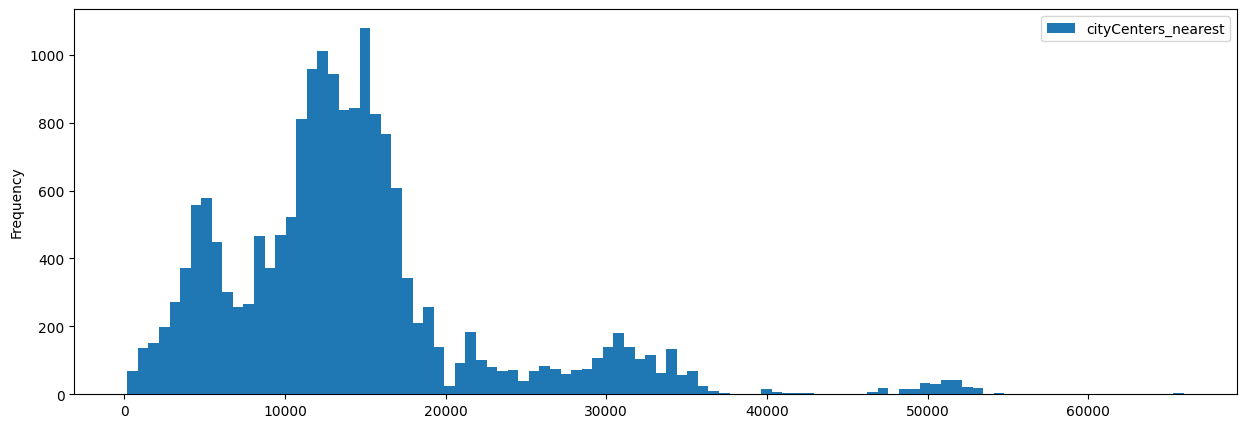

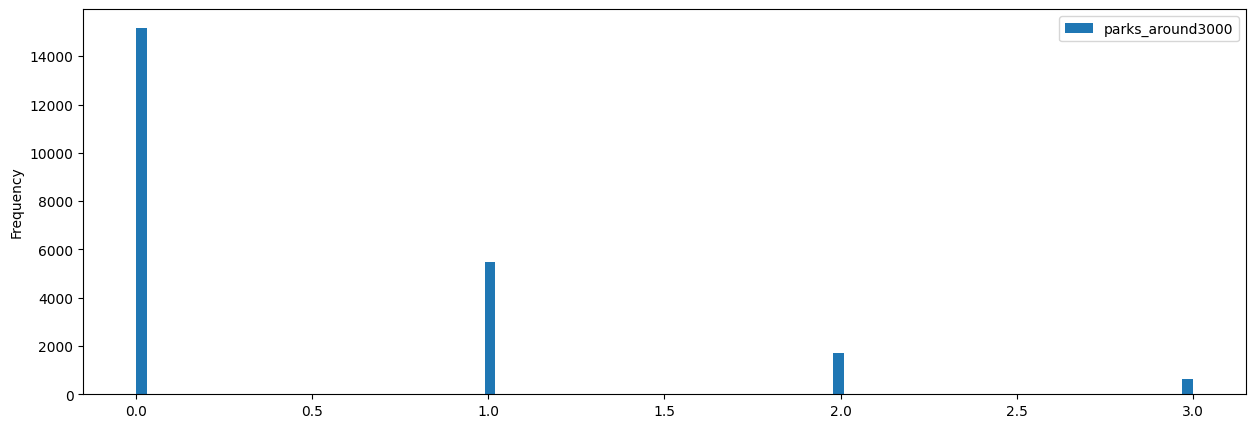

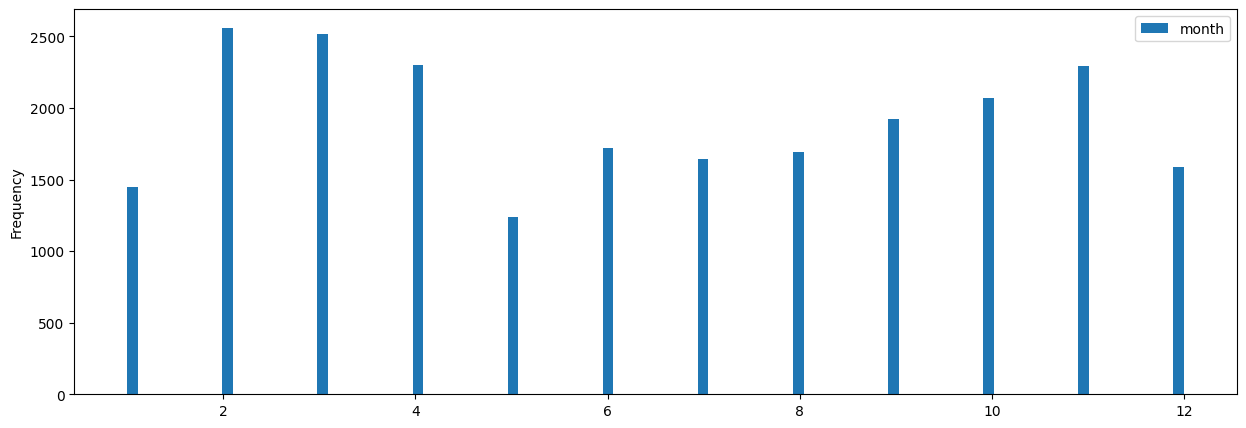

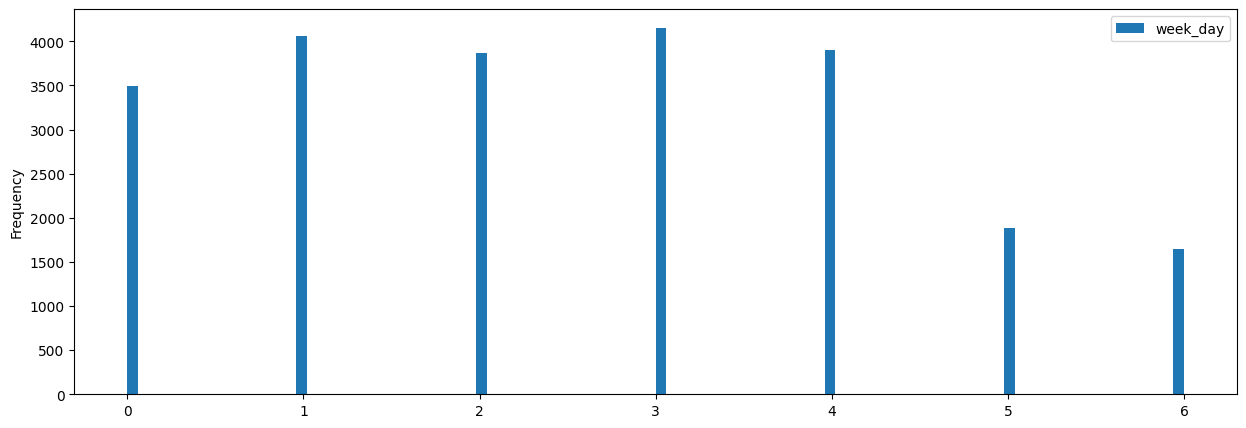

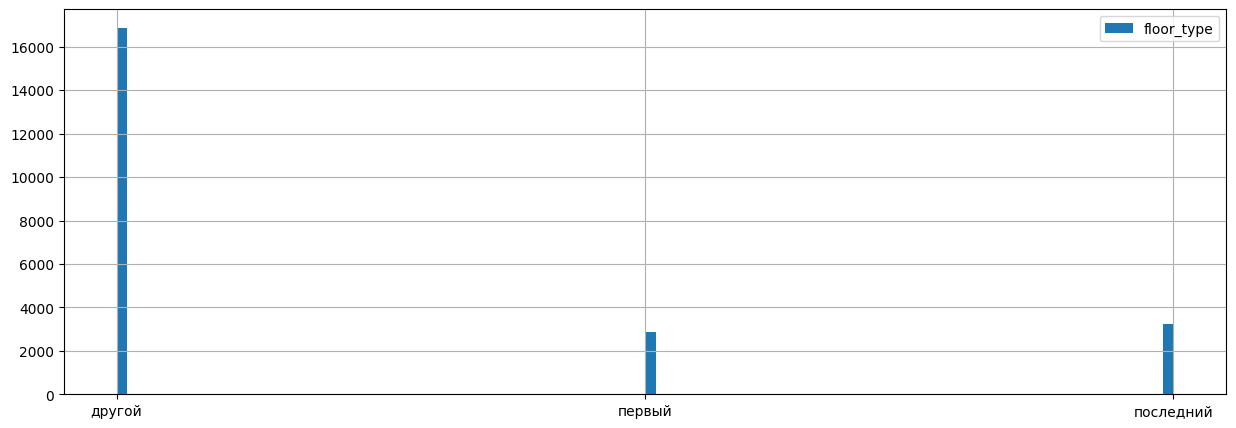

In [16]:
data2 = data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor',
              'floor_type', 'floors_total', 'cityCenters_nearest', 'parks_around3000', 'month', 'week_day']]
data2['total_area'].plot(kind = 'hist', legend=True, bins=100, figsize = (15, 5))
plt.show()
data2['living_area'].plot(kind = 'hist', legend=True, bins=100, figsize = (15, 5))
plt.show()
data2['kitchen_area'].plot(kind = 'hist', legend=True, bins=100, figsize = (15, 5))
plt.show()
data2['last_price'].plot(kind = 'hist', legend=True, bins=100, range=(0,50000000), figsize = (15, 5))
plt.show()
data2['rooms'].plot(kind = 'hist', legend=True, bins=100, figsize = (15, 5))
plt.show()
data2['ceiling_height'].plot(kind = 'hist', legend=True, bins=100, figsize = (15, 5))
plt.show()
data2['floor'].plot(kind = 'hist', legend=True, bins=100, figsize = (15, 5))
plt.show()
data2['floors_total'].plot(kind = 'hist', legend=True, bins=100, figsize = (15, 5))
plt.show()
data2['cityCenters_nearest'].plot(kind = 'hist', legend=True, bins=100, figsize = (15, 5))
plt.show()
data2['parks_around3000'].plot(kind = 'hist', legend=True, bins=100, figsize = (15, 5))
plt.show()
data2['month'].plot(kind = 'hist', legend=True, bins=100, figsize = (15, 5))
plt.show()
data2['week_day'].plot(kind = 'hist', legend=True, bins=100, figsize = (15, 5))
plt.show()
data2['floor_type'].hist(bins=100, legend=True, figsize = (15, 5));

- Общая площадь на пике - около 50 кв.м. Основная масса квартир площадью 40-70 кв.м.
- Жилая площадь в основном от 10 до 50 кв. м. Есть «провал» на 20 кв. м.
- Площадь кухни в основном от 6 до 15 кв.м.
- Цена на пике  около 4 млн., основная масса квартир стоимостью 2-7 млн.
- Количество комнат в основном 1, 2, меньше 3.
- Высота потолков в основном 2,7 м, часто встречается 2,5, реже 3
- Этажи продаваемых квартир в основном от 1 до 5. Самый популярный 2 этаж. 6-х этажей значительно меньше, и чем выше этаж, тем меньше объявлений
- Общее число этажей в основном 5, меньше – 9. Остальных значительно меньше.
- От центра основная масса квартир удалена в пределах 10-17 км.
- Парков рядом с жильем в большинстве случаев нет, в  примерно в 20 % случаях 1 парк рядом, реже 2 и редко 3.
- Месяцы февраль и ноябрь – самые популярные для размещения объявлений. К лету количество объявлений падает и далее – снова увеличивается, падая в декабре и январе.
- Во вторник и четверг чаще публикуют объявления. В выходные – значительно реже.
- Первый и последний этажи  примерно одинаково часто выставляют на продажу.

**4.2. Скорость продаж квартир**

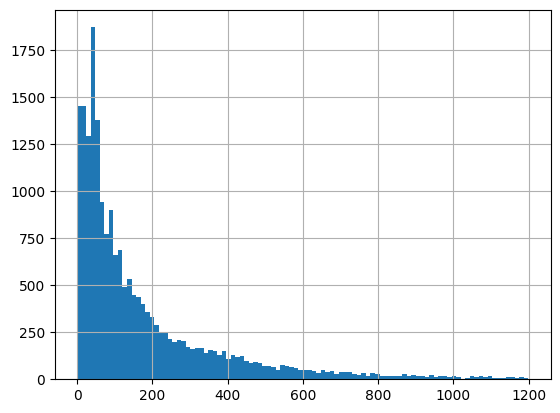

In [17]:
data['days_exposition'].hist(bins=100);

175.57558723147963
95.0


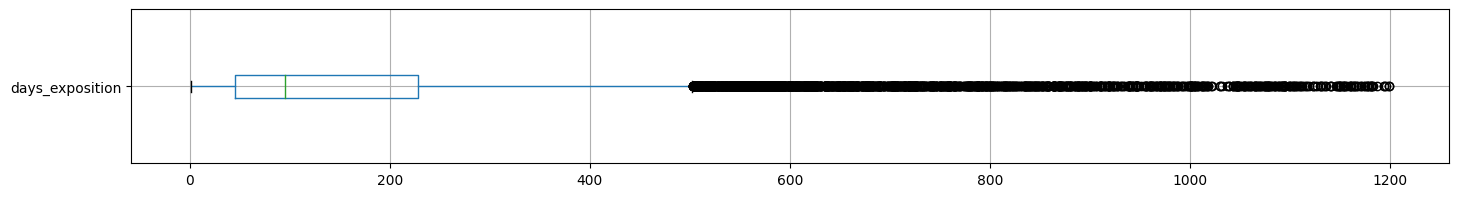

In [18]:
print(data['days_exposition'].mean())
print(data['days_exposition'].median())
data.boxplot(column = 'days_exposition', vert = False, figsize = (17,2));

Если рассчитывать всю выборку, без учета конкретного года, продажа, как правило, занимает 95 дней. Это показывает медиана. Среднее значение искажено редкими объявлениями, долго находящимися на публикаци. Есть быстрые продажи - в первые дни публикации. Часто квартиры продают в срок до месяца. Срок более года - уже необычно долго.

In [19]:
print(data.groupby('year')['days_exposition'].agg(['median', 'mean']).round())

      median   mean
year               
2014   754.0  807.0
2015   556.0  605.0
2016   238.0  322.0
2017   103.0  159.0
2018    63.0   94.0
2019    23.0   31.0


In [20]:
data['year'].value_counts()

2018    8311
2017    7967
2019    2802
2016    2720
2015    1081
2014     114
Name: year, dtype: int64

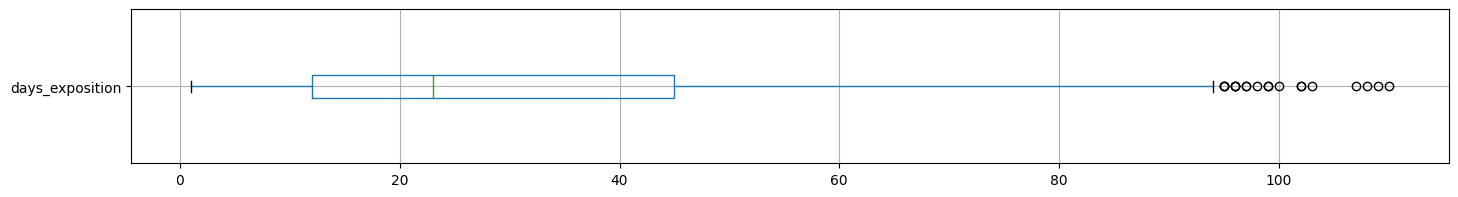

In [21]:
data_2019 = data.query('year == 2019')
data_2019.boxplot(column = 'days_exposition', vert = False, figsize = (17,2));

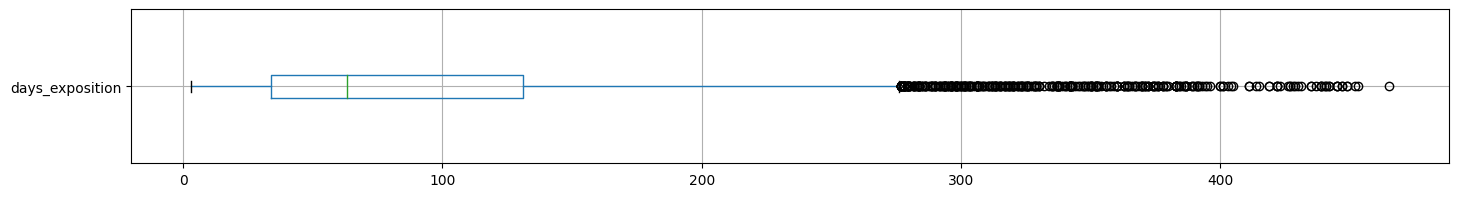

In [22]:
data_2018 = data.query('year == 2018')
data_2018.boxplot(column = 'days_exposition', vert = False, figsize = (17,2));

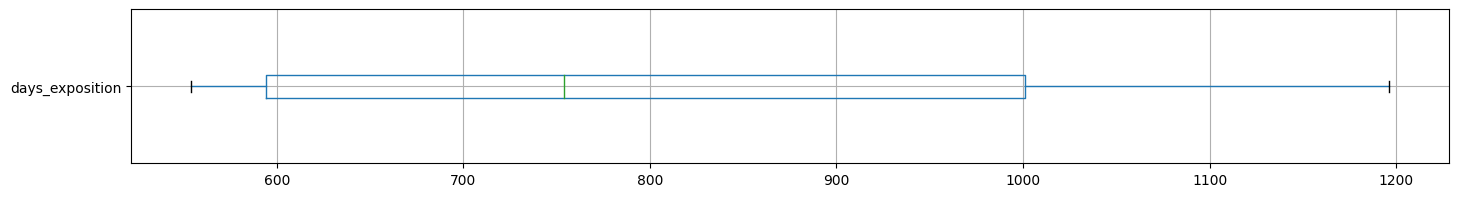

In [23]:
data_2014 = data.query('year == 2014')
data_2014.boxplot(column = 'days_exposition', vert = False, figsize = (17,2));

С каждым годом увеличивается скорость продаж квартир. Так как 2019 год не полный, можно судить по 2018 году - средняя скорость продажи 63 дня. Долгая продажа - более 5 месяцев, в первые дни публикации и до месяца - быстро.

In [24]:
print(data['last_price'].corr(data['days_exposition']))
print(data['total_area'].corr(data['days_exposition']))
print(data['rooms'].corr(data['days_exposition']))
print(data['floor'].corr(data['days_exposition']))

0.11277263816911151
0.14864404120698044
0.11890310559088008
-0.038044616735828526


**4.3. Влияние параметров на цену**

0.7259817208787228


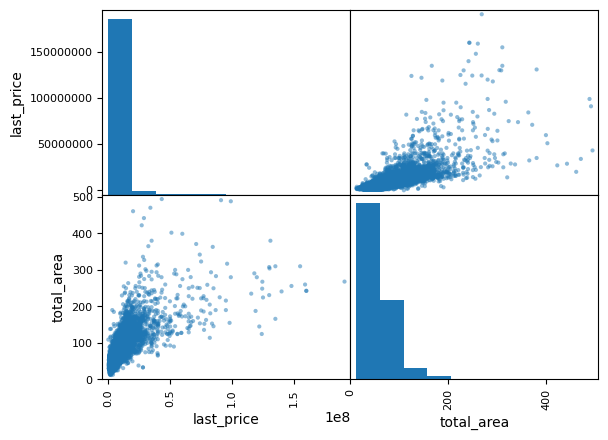

0.6387793835264095


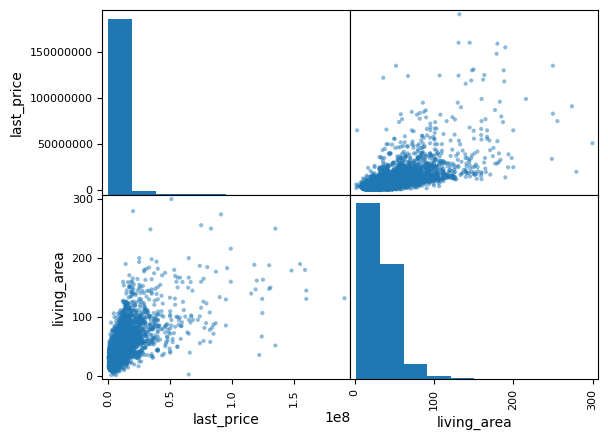

0.5595551301483898


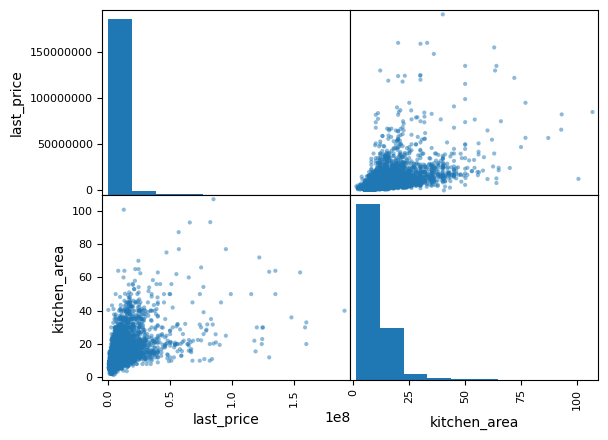

0.4106008885654131


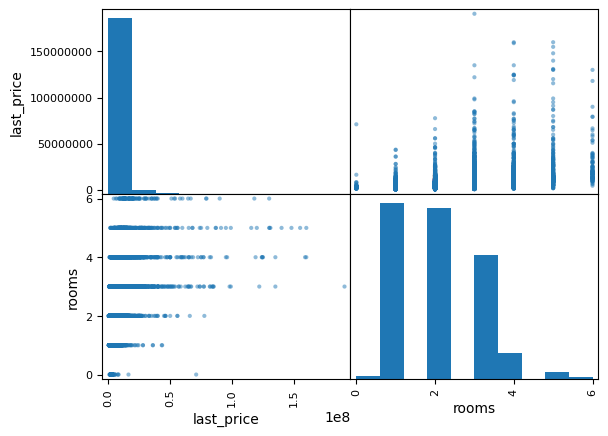

floor_type
другой       4800000.0
первый       3900000.0
последний    4300000.0
Name: last_price, dtype: float64
month
1     4600000.0
2     4600000.0
3     4600000.0
4     4750000.0
5     4500000.0
6     4400000.0
7     4600000.0
8     4550000.0
9     4690000.0
10    4550000.0
11    4650000.0
12    4650000.0
Name: last_price, dtype: float64
week_day
0    4600000.0
1    4700000.0
2    4650000.0
3    4600000.0
4    4550000.0
5    4500000.0
6    4500000.0
Name: last_price, dtype: float64


In [25]:
pd.plotting.scatter_matrix(data[['last_price', 'total_area']])
print(data['last_price'].corr(data['total_area']))
plt.show()
pd.plotting.scatter_matrix(data[['last_price', 'living_area']])
print(data['last_price'].corr(data['living_area']))
plt.show()
pd.plotting.scatter_matrix(data[['last_price', 'kitchen_area']])
print(data['last_price'].corr(data['kitchen_area']))
plt.show()
pd.plotting.scatter_matrix(data[['last_price', 'rooms']])
print(data['last_price'].corr(data['rooms']))
plt.show()

print(data.groupby('floor_type')['last_price'].median())
print(data.groupby('month')['last_price'].median())
print(data.groupby('week_day')['last_price'].median())

In [26]:
price_year = data.pivot_table(columns='year', values=['last_price','total_area'], aggfunc=['count','median'])
display(price_year)

count                                     median             \
year        2014  2015  2016  2017  2018  2019         2014       2015   
last_price   114  1081  2720  7967  8311  2802  7388280.000  5239000.0   
total_area   114  1081  2720  7967  8311  2802       75.015       59.9   

                                                        
year             2016       2017       2018       2019  
last_price  4500000.0  4500000.0  4520000.0  5000000.0  
total_area       53.0       51.5       50.0       51.2

Цена зависит от:
- общей площади, в том числе, но в меньшей степени: жилой площади, площади кухни;
- количества комнат (в меньшей степени);
- этажа, на котором расположена квартира (первый - ниже, последний - выше, но ниже, чем "другой").

Дата размещения (день недели, месяц) незначительно влияют на цену.

В 2014 году наблюдалась самая высокая средняя цена. В дальнейшем цена снизилась одновременно со снижением средней площади недвижимости при увеличении количества объявлений. В 2019 году было повышение стоимости и увеличением площади.

**4.4. Населённые пункты с самой высокой и низкой стоимостью квадратного метра**

In [27]:
biggest_locations = data.pivot_table(index = 'locality_name', values = 'price_meter', aggfunc=['mean', 'count'])
biggest_locations.columns = ['price', 'count']
biggest_location_sorted = biggest_locations.sort_values(by='count', ascending=False).head(10).round(2)
biggest_location_sorted

,price,count
locality_name,,
санкт-петербург,114020.16,15238
поселок мурино,85470.38,532
поселок шушары,78661.67,433
всеволожск,68646.87,385
пушкин,103124.80,365
колпино,75125.52,329
поселок парголово,90286.84,324
гатчина,68611.94,298
деревня кудрово,92723.18,287


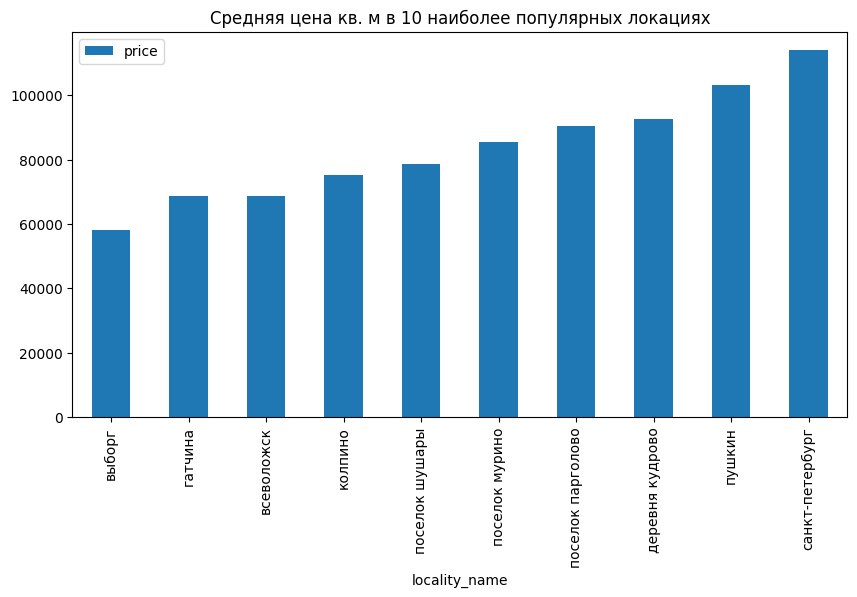

In [28]:
biggest_location_sorted.sort_values(by='price').plot(kind='bar', y='price', figsize = (10, 5));
plt.title('Средняя цена кв. м в 10 наиболее популярных локациях');

В наиболее многочисленных публикациях по населенным пунктам, самая высокая стоимость квадратного метра в Санкт-Петербурге (114 020 руб.), низкая - в Выборге (58 141 руб.)

**4.5. Cредняя цена в зависимости от удаленности от центра**

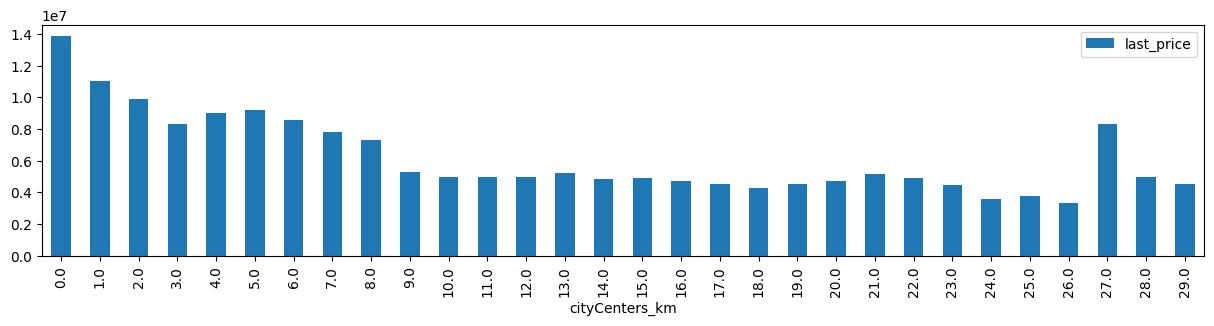

In [29]:
data_spb = data.query('locality_name == "санкт-петербург"')
data_spb.pivot_table(index='cityCenters_km', values='last_price', aggfunc='median').plot(kind='bar', figsize=(15,3));

Наблюдается явная тенденция к снижению стоимости средней стоимости квартир с увеличением расстояния от центра. Однако имеются отдельные выбивающиеся значения цены: резкое повышение на 27 км, падение на 3 км и повышение на 5 км. Изучим 3, 5 и 27 км подробнее.

In [30]:
display(data_spb.query('cityCenters_km == 26'))
display(data_spb.query('cityCenters_km == 27'))
display(data_spb.query('cityCenters_km == 28'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,week_day,month,year,cityCenters_km,floor_type
253,17,3340000.0,37.00,2018-03-28,1,2.65,5.0,19.00,4,False,...,251.0,1.0,350.0,75.0,90270.270270,2,3,2018,26.0,другой
539,13,3250000.0,40.00,2018-06-25,1,2.56,10.0,NaN,1,False,...,159.0,1.0,1250.0,45.0,81250.000000,0,6,2018,26.0,первый
1238,7,3355000.0,37.77,2017-12-21,1,2.70,12.0,14.56,5,False,...,159.0,1.0,1250.0,147.0,88827.111464,3,12,2017,26.0,другой
3338,6,3090000.0,33.30,2017-01-17,1,2.65,5.0,12.00,4,False,...,126.0,1.0,979.0,489.0,92792.792793,1,1,2017,26.0,другой
3775,10,3392333.0,34.51,2018-10-01,1,2.80,5.0,15.00,4,False,...,400.0,1.0,492.0,145.0,98300.000000,0,10,2018,26.0,другой
3981,5,2950000.0,36.30,2016-12-28,1,2.65,5.0,15.25,1,False,...,126.0,1.0,979.0,159.0,81267.217631,2,12,2016,26.0,первый
5138,10,3085024.0,33.33,2018-10-06,1,2.65,NaN,11.00,12,False,...,400.0,1.0,492.0,140.0,92559.975998,5,10,2018,26.0,другой
5230,13,3150000.0,50.00,2018-09-04,2,2.50,3.0,28.00,3,False,...,NaN,0.0,NaN,30.0,63000.000000,1,9,2018,26.0,последний
6126,10,5467707.0,58.13,2018-11-04,3,2.55,NaN,31.00,6,False,...,251.0,1.0,350.0,110.0,94059.986238,6,11,2018,26.0,другой
6148,10,5254628.0,57.39,2018-10-10,3,2.70,5.0,31.00,3,False,...,251.0,1.0,350.0,135.0,91559.993030,2,10,2018,26.0,другой


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,week_day,month,year,cityCenters_km,floor_type
748,13,14350000.0,74.0,2017-11-28,2,2.65,5.0,30.0,3,False,...,1496.0,0.0,NaN,128.0,193918.918919,1,11,2017,27.0,другой
5951,6,2250000.0,32.0,2018-02-27,1,2.50,2.0,16.5,2,False,...,NaN,0.0,NaN,178.0,70312.500000,1,2,2018,27.0,последний


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,week_day,month,year,cityCenters_km,floor_type
814,0,7600000.0,111.0,2017-07-26,3,2.65,16.0,63.0,12,False,...,185.0,2.0,72.0,66.0,68468.468468,2,7,2017,28.0,другой
1110,0,4072000.0,38.0,2015-10-14,1,2.65,5.0,16.0,4,False,...,NaN,0.0,NaN,285.0,107157.894737,2,10,2015,28.0,другой
9556,0,3413000.0,43.0,2015-11-10,1,2.75,5.0,18.0,1,False,...,NaN,0.0,NaN,258.0,79372.093023,1,11,2015,28.0,первый
17766,0,4990000.0,71.0,2015-10-14,3,3.10,5.0,42.0,1,False,...,NaN,0.0,NaN,285.0,70281.690141,2,10,2015,28.0,первый
18907,0,3666000.0,39.0,2015-11-09,1,2.65,5.0,16.0,2,False,...,NaN,0.0,NaN,259.0,94000.000000,0,11,2015,28.0,другой
22869,0,5144000.0,64.0,2015-10-14,2,2.65,5.0,33.0,5,False,...,NaN,0.0,NaN,285.0,80375.000000,2,10,2015,28.0,последний
23097,17,6300000.0,92.0,2017-07-20,3,2.60,16.0,46.0,7,False,...,36.0,2.0,46.0,14.0,68478.260870,3,7,2017,28.0,другой


Резкое возрастание средней цены на 27 км объясняется малым количеством значений (всего 2) с одновременым наличием квартиры высокой стоимости (14 млн) и большой площади. Соответственно 27 км не будем принимать в учет при определения тенденции к снижению цены.

In [31]:
display(data_spb.query('cityCenters_km == 3'))
display(data_spb.query('cityCenters_km == 5'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,week_day,month,year,cityCenters_km,floor_type
99,32,9600000.0,90.0,2017-09-26,4,2.50,5.0,67.0,2,False,...,NaN,0.0,NaN,104.0,106666.666667,1,9,2017,3.0,другой
138,8,4800000.0,40.0,2017-11-18,2,2.65,3.0,29.0,2,False,...,NaN,2.0,729.0,80.0,120000.000000,5,11,2017,3.0,другой
154,1,8200000.0,80.0,2018-11-06,3,3.00,3.0,44.2,2,False,...,344.0,1.0,838.0,38.0,102500.000000,1,11,2018,3.0,другой
179,5,14800000.0,108.7,2019-04-11,3,2.65,5.0,72.4,5,False,...,559.0,0.0,NaN,NaN,136154.553818,3,4,2019,3.0,последний
181,2,7900000.0,71.8,2017-08-23,3,2.64,5.0,38.7,1,False,...,NaN,1.0,585.0,NaN,110027.855153,2,8,2017,3.0,первый
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23128,2,6800000.0,69.2,2017-11-14,3,2.50,5.0,39.9,4,False,...,436.0,1.0,666.0,447.0,98265.895954,1,11,2017,3.0,другой
23130,7,5950000.0,60.0,2018-02-01,3,2.65,5.0,42.0,1,False,...,NaN,0.0,NaN,85.0,99166.666667,3,2,2018,3.0,первый
23338,7,5600000.0,50.0,2017-08-21,1,2.65,5.0,27.0,1,False,...,394.0,3.0,56.0,45.0,112000.000000,0,8,2017,3.0,первый
23381,18,5260000.0,38.0,2018-11-06,1,2.65,5.0,16.0,1,False,...,538.0,1.0,466.0,12.0,138421.052632,1,11,2018,3.0,первый


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,week_day,month,year,cityCenters_km,floor_type
63,2,20000000.0,118.0,2018-09-11,3,2.65,9.0,68.0,7,False,...,648.0,1.0,779.0,37.0,169491.525424,1,9,2018,5.0,другой
141,8,6500000.0,32.6,2019-02-27,1,2.65,5.0,18.5,5,False,...,NaN,0.0,NaN,NaN,199386.503067,2,2,2019,5.0,последний
159,14,7050000.0,66.0,2017-09-04,3,2.75,4.0,37.8,4,False,...,NaN,1.0,1013.0,98.0,106818.181818,0,9,2017,5.0,последний
219,12,7700000.0,58.7,2017-12-12,1,2.65,7.0,17.0,3,False,...,239.0,0.0,NaN,136.0,131175.468484,1,12,2017,5.0,другой
262,14,37500000.0,158.0,2019-01-24,4,2.65,12.0,88.0,4,False,...,NaN,2.0,840.0,NaN,237341.772152,3,1,2019,5.0,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23510,20,13800000.0,108.6,2016-09-12,3,2.75,19.0,70.6,7,False,...,NaN,1.0,503.0,354.0,127071.823204,0,9,2016,5.0,другой
23539,7,8100000.0,69.0,2015-10-14,2,2.60,10.0,NaN,8,False,...,NaN,1.0,874.0,823.0,117391.304348,2,10,2015,5.0,другой
23541,0,21187872.0,123.3,2017-04-25,3,2.65,NaN,50.4,18,False,...,NaN,0.0,NaN,104.0,171840.000000,1,4,2017,5.0,другой
23615,5,9000000.0,110.0,2015-12-10,4,2.70,7.0,64.6,5,False,...,417.0,1.0,118.0,816.0,81818.181818,3,12,2015,5.0,другой


In [32]:
data_spb.pivot_table(index='cityCenters_km', columns='floor_type', values='last_price', aggfunc='count')

floor_type,другой,первый,последний
cityCenters_km,,,
0.0,18.0,3.0,4.0
1.0,116.0,20.0,44.0
2.0,176.0,44.0,77.0
3.0,208.0,54.0,74.0
4.0,473.0,79.0,110.0
5.0,660.0,79.0,131.0
6.0,439.0,65.0,92.0
7.0,321.0,32.0,60.0
8.0,461.0,52.0,65.0


In [33]:
#заметна высокая доля квартир на первом и последнем этаже на 3 км
print(54 / 336)
print(74 / 336)

#заметна низкая доля квартир на первом и последнем этаже на 5 км
print(79 / 870)
print(131 / 870)

0.16071428571428573
0.22023809523809523
0.09080459770114943
0.15057471264367817


Прихожу к выводу, что падение средней цены на 3 км обусловлено высокой долей квартир на 1 и последнем этажах, которые стоят дешевле. Противоположно на 5 км: низкая доля квартир на 1 и последнем этажах приводит к повышению средней цены. Соответственно 3 и 5 км не будем принимать в учет при определения тенденции к снижению цены.

## Выводы

На исследование представлен архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах с целью поиска интересных особенностей и зависимостей, которые существуют на рынке недвижимости.

В базе данных обнаружился ряд проблем, затрудняющих проведенеие исследования (пропущенные и аномальные значения, дубликаты). В связи с этим дополнительно была выполнена предобработка данных (замена пропущенных значений медианными, удаление явных дубликатов, изменение разных написаний схожих значений и удаление лишних).

После проведения предобработки было осуществлено исследование путем изучения и сопоставления значений из имеющихся столбцов, добавления новых столбцов для последующего иследования (цена за кв. м, тип этажа, расстояние до центра в км, день недели, месяц и год).

В результате исследования были сделаны следующие выводы:
- Основная масса квартир площадью 40-70 кв.м.
- Основная масса квартир стоимостью 2 - 7 млн. руб.
- Количество комнат в основном 1-3
- Этажи продаваемых квартир в основном от 1 до 5. Самый популярный 2 этаж. 6-х этажей значительно меньше, и чем выше этаж, тем меньше объявлений
- Общее число этажей в основном 5, меньше – 9. Остальных значительно меньше.
- От центра основная масса квартир удалена в пределах 10-17 км.
- Месяцы февраль и ноябрь – самые популярные для размещения объявлений. К лету количество объявлений падает и далее – снова увеличивается, падая в декабре и январе.
- Во вторник и четверг чаще публикуют объявления. В выходные – значительно реже.
- Первый и последний этажи  примерно одинаково часто выставляют на продажу (вместе около 20% объявлений).
- Продажа, как правило, занимает 90 дней.
- Цена зависит от: общей площади (в том числе, но в меньшей степени жилой площади, площади кухни), количества комнат (в меньшей степени); этажа квартиры (первый - ниже, последний - выше, но ниже, чем "другой").
- В наиболее многочисленных публикациях по населенным пунктам, самая высокая стоимость квадратного метра в Санкт-Петербурге (114 020 руб.), низкая - в Выборге (58 141 руб.)
- Стоимость кв.м снижается с увеличением расстояния от центра.
- С каждым годом увеличивается скорость продаж квартир. Так, в 2018 году средняя скорость продажи 63 дня. Долгая продажа - более 5 месяцев, в первые дни публикации и до месяца - быстро.